In [133]:
import alpaca_trade_api as tradeapi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import os
from scipy.signal import savgol_filter
from collections import deque

In [134]:
data = []
DATA_FOLDER_PATH = "DATA/AAPL"
for file in os.listdir(DATA_FOLDER_PATH):
    data.append(pd.read_csv(DATA_FOLDER_PATH + "/" + file))

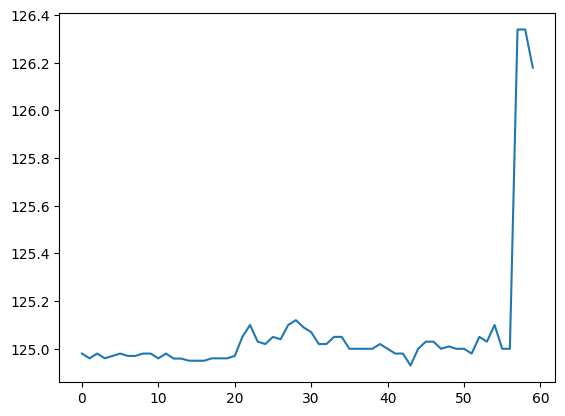

In [135]:
prices = data[1]['close']
times = data[1]['timestamp']
window = 60
RBT =  .006
RST = .006
MA_SUM = 0
MA_WINDOW = deque()
MA_ARR = []

for i in range(window):
    MA_WINDOW.append(prices[i])
    MA_SUM += prices[i]

plt.plot(MA_WINDOW)

In [136]:
buy_price = 0
sell_price = 0
sell_time = ""
buy_time = ""
HISTORY = []
num_trades = 0

MA_ARR.append(MA_SUM / window)

money = 1

ROC_ARR = []
for i in range(window, len(prices)):
    MA_SUM -= MA_WINDOW.popleft()
    MA_WINDOW.append(prices[i])
    MA_SUM += prices[i]
    MA_ARR.append(MA_SUM / window)

    ROC = MA_ARR[len(MA_ARR) - 1] - MA_ARR[len(MA_ARR) - 2]
    ROC_ARR.append(ROC) 

    if ROC > RBT and buy_price == 0:
        buy_price = prices[i]
        buy_time = times[i]

    if ROC < RST and buy_price != 0:
        sell_price = prices[i]
        sell_time = times[i]
        money *= sell_price / buy_price

        print("Trade no.", num_trades, "buy@:", buy_price, ",", buy_time, "sell@:", sell_price, ",", sell_time, "profit:", sell_price / buy_price)

        num_trades += 1
        buy_price = 0
print(money)


Trade no. 0 buy@: 126.35 , 2023-01-04 09:03:00+00:00 sell@: 126.4 , 2023-01-04 10:07:00+00:00 profit: 1.0003957261574992
Trade no. 1 buy@: 126.31 , 2023-01-04 13:20:00+00:00 sell@: 126.3 , 2023-01-04 13:29:00+00:00 profit: 0.9999208297046948
Trade no. 2 buy@: 126.4 , 2023-01-04 13:30:00+00:00 sell@: 126.26 , 2023-01-04 13:34:00+00:00 profit: 0.9988924050632911
Trade no. 3 buy@: 126.39 , 2023-01-04 13:39:00+00:00 sell@: 126.34 , 2023-01-04 13:40:00+00:00 profit: 0.9996043990822059
Trade no. 4 buy@: 126.37 , 2023-01-04 13:41:00+00:00 sell@: 126.15 , 2023-01-04 14:01:00+00:00 profit: 0.9982590804779615
Trade no. 5 buy@: 126.35 , 2023-01-04 14:06:00+00:00 sell@: 126.3 , 2023-01-04 14:10:00+00:00 profit: 0.9996042738425011
Trade no. 6 buy@: 126.57 , 2023-01-04 14:11:00+00:00 sell@: 126.34 , 2023-01-04 14:12:00+00:00 profit: 0.9981828237339023
Trade no. 7 buy@: 126.75 , 2023-01-04 14:28:00+00:00 sell@: 126.562 , 2023-01-04 14:30:00+00:00 profit: 0.9985167652859961
Trade no. 8 buy@: 126.72 , 

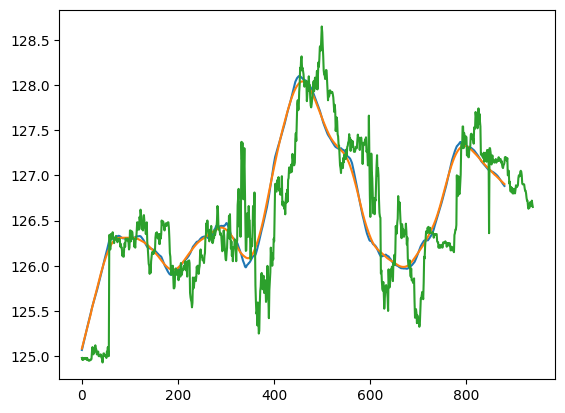

In [137]:
plt.plot(MA_ARR)
filtered = savgol_filter(MA_ARR, 40, 1)
plt.plot(filtered)
plt.plot(prices)